In [1]:
from __future__ import division, print_function, unicode_literals

# import base packages into the namespace for this program
import numpy as np
import pandas as pd
import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'
import time
import re
import math
from docx import Document

# import packages for data visulatzation 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# modeling routines from Scikit Learn packages for model develipment
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix , accuracy_score , classification_report, make_scorer,recall_score
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import regularizers

# obtain precision, recall, F1, and support metrics for model evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# specify the set of classifiers being evaluated
from sklearn.ensemble import RandomForestClassifier

import matplotlib as mpl
mpl.rcParams['font.family'] = 'Times New Roman'

import warnings
warnings.filterwarnings("ignore")
# set KMP_DUPLICATE_LIB_OK=TRUE      #  Windows
# set up randam seed
random_seed = 55
import tensorflow as tf
import torch
import platform

from sklearn.impute import KNNImputer
import pickle

In [2]:
df_input = pd.read_excel("E:/CNSI_project/demo_and_data_5.0/Processed_data/Extr_val/aim1_dataset_ExVal_0toNan_0.4filter_v2.0.xlsx")
print(df_input.culture.value_counts())
# df_input = df_input.iloc[:,:-1]
df_input

0    1466
1     107
Name: culture, dtype: int64


,B_pO2,B_Albumin,B_Creatinine,B_Glucose,B_H,B_I,B_LactateDehydrogenase,B_Potassium,B_Sodium,B_Hemoglobin,...,B_MonocyteCount,B_ImmatureGranulocytes,B_RDW-SD,C_Lymphs,C_Macrophage,C_Ploys,resprate,pain,acuity,culture
0,111.0,NaN,0.7,101.0,NaN,NaN,204.0,3.7,133.0,NaN,...,NaN,NaN,NaN,33.0,NaN,37.0,12.076923,NaN,NaN,0
1,NaN,3.1,0.5,107.0,NaN,NaN,NaN,3.4,138.0,10.8,...,NaN,NaN,13.0,NaN,NaN,NaN,17.066667,NaN,NaN,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.6,146.0,19.9,...,NaN,NaN,17.2,37.0,6.0,1.0,NaN,NaN,NaN,0
3,NaN,NaN,0.7,111.0,NaN,NaN,NaN,3.6,145.0,14.4,...,NaN,NaN,13.8,63.0,NaN,61.0,16.800000,NaN,NaN,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.8,...,NaN,NaN,17.1,9.0,16.0,1.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,NaN,NaN,0.8,147.0,NaN,NaN,NaN,4.0,142.0,11.1,...,NaN,NaN,13.7,4.0,NaN,85.0,22.065217,NaN,NaN,0
1569,158.0,NaN,0.9,149.0,NaN,NaN,NaN,3.9,141.0,11.4,...,NaN,NaN,13.2,11.0,4.0,69.0,23.571429,NaN,NaN,0
1570,98.0,NaN,1.0,142.0,NaN,NaN,274.0,3.8,143.0,10.6,...,NaN,NaN,13.2,8.0,27.0,63.0,25.758621,NaN,NaN,0
1571,111.0,NaN,0.9,156.0,NaN,NaN,NaN,4.9,142.0,9.8,...,NaN,NaN,13.0,29.0,NaN,63.0,23.560000,NaN,NaN,0


In [3]:
df_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   B_pO2                   882 non-null    float64
 1   B_Albumin               341 non-null    float64
 2   B_Creatinine            1401 non-null   float64
 3   B_Glucose               1390 non-null   float64
 4   B_H                     0 non-null      float64
 5   B_I                     0 non-null      float64
 6   B_LactateDehydrogenase  236 non-null    float64
 7   B_Potassium             1482 non-null   float64
 8   B_Sodium                1484 non-null   float64
 9   B_Hemoglobin            1559 non-null   float64
 10  B_lymphocytes           595 non-null    float64
 11  B_MCHC                  1559 non-null   float64
 12  B_MonocytesPercentage   585 non-null    float64
 13  B_Platelet              1566 non-null   float64
 14  B_PTT                   909 non-null    

In [4]:
df_ExVal = df_input.copy()
df_ExVal.culture.value_counts()

0    1466
1     107
Name: culture, dtype: int64

In [5]:
columns2 = df_ExVal.columns
index2 = df_ExVal.index

with open('E:/CNSI_project/demo_and_data_5.0/Processed_data/StandardPickleFiles/imputer_KNNImputer_aim1_CNN.pickle', 'rb') as f:  
    imputer = pickle.load(f)
    
df_ExVal = imputer.transform(df_ExVal)

df_ExVal = pd.DataFrame(df_ExVal, columns=columns2, index=index2)
df_ExVal['culture'] = df_ExVal['culture'].astype(np.int16)
df_ExVal

,B_pO2,B_Albumin,B_Creatinine,B_Glucose,B_H,B_I,B_LactateDehydrogenase,B_Potassium,B_Sodium,B_Hemoglobin,...,B_MonocyteCount,B_ImmatureGranulocytes,B_RDW-SD,C_Lymphs,C_Macrophage,C_Ploys,resprate,pain,acuity,culture
0,111.000000,3.766944,0.700000,101.000000,9.233520,1.000000,204.000000,3.700000,133.000000,12.077734,...,0.495330,0.534331,39.085556,33.000000,9.231051,37.000000,12.076923,2.626119,2.545799,0
1,162.642603,3.100000,0.500000,107.000000,8.857589,0.822000,1965.345640,3.400000,138.000000,10.800000,...,0.165720,0.832759,13.000000,41.976265,18.496853,0.689184,17.066667,6.973060,2.156152,0
2,102.085257,2.901116,0.952970,128.094703,6.165163,1.000000,261.799176,4.600000,146.000000,19.900000,...,0.344231,0.545803,17.200000,37.000000,6.000000,1.000000,18.409804,11.496409,1.337721,0
3,163.669010,3.800294,0.700000,111.000000,17.978284,1.000000,245.500667,3.600000,145.000000,14.400000,...,0.928365,0.417085,13.800000,63.000000,4.539280,61.000000,16.800000,5.313905,2.368478,0
4,164.648342,3.646975,0.847813,121.442208,24.529381,0.789780,180.278220,3.811545,139.644423,13.800000,...,0.583961,0.601724,17.100000,9.000000,16.000000,1.000000,18.874176,6.051176,2.197152,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,112.568257,3.786718,0.800000,147.000000,48.150079,0.768510,265.594728,4.000000,142.000000,11.100000,...,0.885561,0.557951,13.700000,4.000000,7.626482,85.000000,22.065217,8.583184,1.585857,0
1569,158.000000,3.598629,0.900000,149.000000,10.892165,1.201162,371.087631,3.900000,141.000000,11.400000,...,0.903672,1.292788,13.200000,11.000000,4.000000,69.000000,23.571429,3.239268,1.879710,0
1570,98.000000,3.386098,1.000000,142.000000,6.803626,0.998679,274.000000,3.800000,143.000000,10.600000,...,1.100134,1.477779,13.200000,8.000000,27.000000,63.000000,25.758621,5.271621,2.234800,0
1571,111.000000,3.577036,0.900000,156.000000,22.246737,0.521855,233.949205,4.900000,142.000000,9.800000,...,0.689196,1.197220,13.000000,29.000000,16.392575,63.000000,23.560000,5.862765,1.552608,0


In [6]:
X_ExVal = df_ExVal.iloc[:,:-1]
y_ExVal = df_ExVal.iloc[:,-1:]

In [7]:
with open('E:/CNSI_project/demo_and_data_5.0/Processed_data/StandardPickleFiles/StandardScaler_aim1_CNN.pickle', 'rb') as f:  
    scaler = pickle.load(f)
X_ExVal = scaler.transform(X_ExVal)
X_ExVal

array([[-3.22783313e-01, -7.63598583e-02, -3.26224917e-01, ...,
        -3.01526703e+00, -7.59533985e-01,  8.14958358e-01],
       [ 6.28401324e-01, -1.45471225e+00, -5.27980516e-01, ...,
        -3.08326122e-01,  7.23283986e-01, -2.26095851e-03],
       [-4.86980440e-01, -1.86573905e+00, -7.10347523e-02, ...,
         4.20327253e-01,  2.26627792e+00, -1.71878235e+00],
       ...,
       [-5.62225161e-01, -8.63442948e-01, -2.35915192e-02, ...,
         4.40706767e+00,  1.42893206e-01,  1.62690978e-01],
       [-3.22783313e-01, -4.68837098e-01, -1.24469318e-01, ...,
         3.21431374e+00,  3.44543036e-01, -1.26809326e+00],
       [ 5.98146869e-01, -1.21616450e+00, -3.26224917e-01, ...,
         1.40820270e+00,  5.44747303e-01, -4.21715846e-01]])

# CNN Evaluation

In [8]:
# load model
from tensorflow.keras.models import load_model
model = load_model('E:/CNSI_project/demo_and_data_5.0/models_test/1131/CNN_0.8398004434589801_0.7346938775510204_1131.h5')

In [9]:
model.evaluate(X_ExVal, y_ExVal)

50/50 [==============================] - 1s 4ms/step - loss: 0.5615 - accuracy: 0.7807


[0.5615434050559998, 0.7806738615036011]

In [10]:
y_predict = model.predict(X_ExVal)
y_predict

50/50 [==============================] - 0s 2ms/step


array([[0.48287603, 0.51712394],
       [0.49441862, 0.5055814 ],
       [0.887083  , 0.112917  ],
       ...,
       [0.37966073, 0.6203393 ],
       [0.3936217 , 0.60637826],
       [0.44996342, 0.5500366 ]], dtype=float32)

In [11]:
y_ExVal

,culture
0,0
1,0
2,0
3,0
4,0
...,...
1568,0
1569,0
1570,0
1571,0


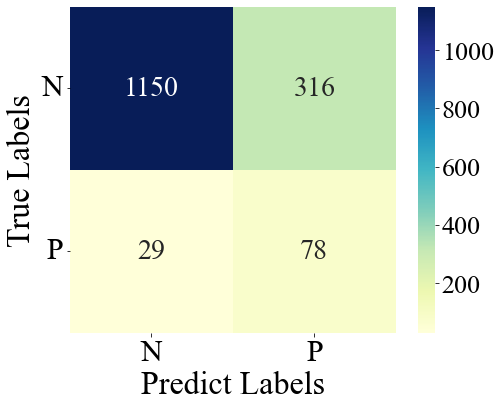

In [12]:
# generate confusion matrix
labels1 = ["N", "P"]
plt.figure(figsize = (8, 6))
cm = confusion_matrix(y_ExVal.values,y_predict.argmax(axis=1))
ax = sns.heatmap(cm, square=True, annot=True , cmap="YlGnBu", annot_kws={"fontsize":28}, fmt=".0f")   #square=True, annot=True showing number
# plt.matshow(cm)
# plt.title('Confusion matrix CNN', fontsize=18)
plt.ylabel("True Labels", fontsize=32)
plt.xlabel("Predict Labels", fontsize=32)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=26)

# plt.colorbar()
plt.xticks([i + 0.5 for i in range(len(labels1))], labels1, rotation = 0, fontsize=30)
plt.yticks([i + 0.5 for i in range(len(labels1))], labels1, rotation = 0, fontsize=30)

plt.show()

In [13]:
cm

array([[1150,  316],
       [  29,   78]], dtype=int64)

In [14]:
predict_matrix = np.zeros(cm.shape)
for i in range(cm.shape[0]):
    temp = np.sum(cm[i])
    for j in range(cm.shape[1]):
        predict_matrix[i,j] = cm[i,j]/temp
predict_matrix

array([[0.78444748, 0.21555252],
       [0.27102804, 0.72897196]])

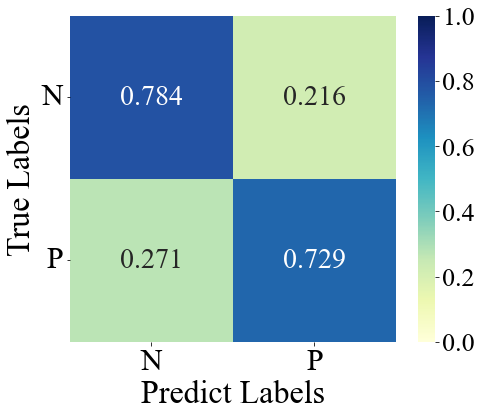

In [15]:
plt.figure(figsize = (8, 6))
ax = sns.heatmap(predict_matrix, square=True, annot=True ,cmap="YlGnBu", annot_kws={"fontsize":28}, fmt=".3f", vmin=0, vmax=1)
plt.xticks([i + 0.5 for i in range(len(predict_matrix))], labels1, rotation = 0, fontsize=30)
plt.yticks([i + 0.5 for i in range(len(predict_matrix))], labels1, rotation = 0, fontsize=30)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=26)

# plt.title('Confusion matrix of prediction', fontsize=18)
plt.ylabel("True Labels", fontsize=32)
plt.xlabel("Predict Labels", fontsize=32)

plt.show()

In [16]:
# calculate evaluation metric using test cohort
accuracy0 = np.round(accuracy_score(y_ExVal.values, 
               y_predict.argmax(axis=1)), decimals = 3)
print('\nCNN Predictive Accuracy: ',accuracy0)


CNN Predictive Accuracy:  0.781


In [17]:
print('\nSummary of CNN Precision and Recall\n') 
print(classification_report(y_ExVal, y_predict.argmax(axis=1), 
                            target_names = labels1, digits=3))


Summary of CNN Precision and Recall

              precision    recall  f1-score   support

           N      0.975     0.784     0.870      1466
           P      0.198     0.729     0.311       107

    accuracy                          0.781      1573
   macro avg      0.587     0.757     0.590      1573
weighted avg      0.923     0.781     0.832      1573



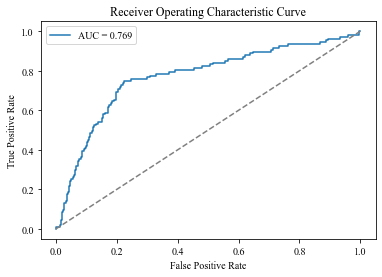

In [18]:
# Calculate AUC score and plot ROC curve
from sklearn.metrics import roc_curve, auc,roc_auc_score

# fpr, tpr, thresholds = roc_curve(label_true.ravel(), label_predict.ravel())
# auc = auc(fpr, tpr)

fpr, tpr, thresholds = roc_curve(y_ExVal, y_predict[:,1])
auc = roc_auc_score(y_ExVal, y_predict[:,1])

plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

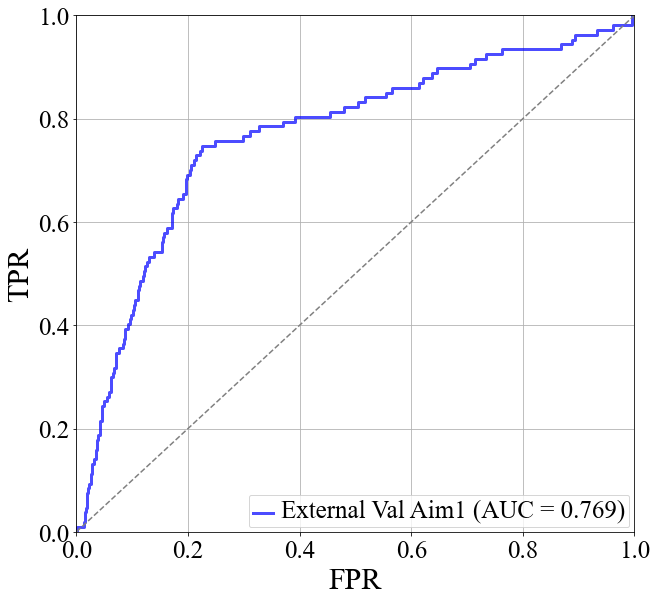

In [19]:
fpr_cnn, tpr_cnn, _ = roc_curve(y_ExVal, y_predict[:,1])
auc_cnn = roc_auc_score(y_ExVal, y_predict[:,1])

plt.figure(figsize=(10, 9.5))
plt.plot(fpr_cnn, tpr_cnn, color='blue', label=f'External Val Aim1 (AUC = {auc_cnn:.3f})', linewidth=3, alpha=0.7)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('FPR', fontsize=30, fontname='Times New Roman')  # False Positive Rate
plt.ylabel('TPR', fontsize=30, fontname='Times New Roman')    # True Positive Rate

legend = plt.legend(loc='lower right')
for text in legend.get_texts():
    text.set_fontname('Times New Roman')
    text.set_fontsize(25)
    
plt.grid()

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xticks(fontsize=25, fontname='Times New Roman')
plt.yticks(fontsize=25, fontname='Times New Roman')

path = os.path.join("E:/CNSI_project/demo_and_data_5.0/figure_in_paper/ExVal", "aim1auc.tif")
plt.savefig(path, dpi=300, bbox_inches='tight')

plt.show()

In [20]:
y_predict.argmax(axis=1)

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

# AUPRC、C-index and Brier Score

FCN AUPRC: 0.193
Baseline (positive class ratio): 0.068


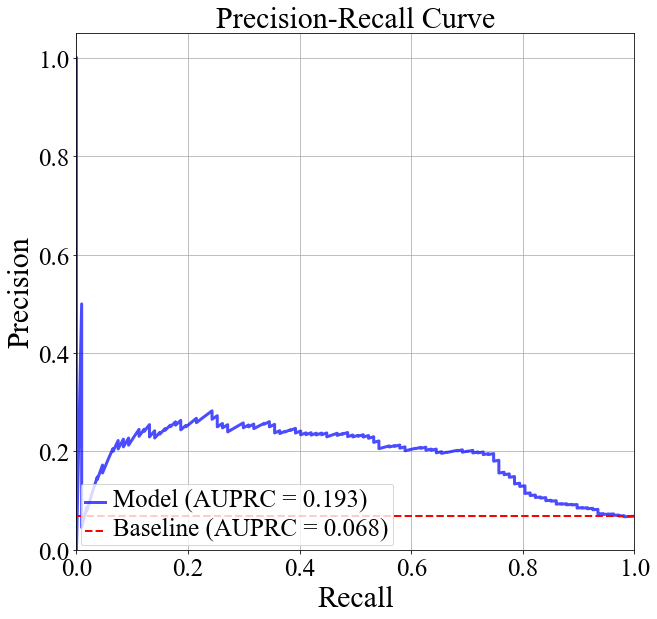

In [22]:
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score, brier_score_loss
from lifelines.utils import concordance_index

# AUPRC
precision, recall, _ = precision_recall_curve(y_ExVal, y_predict[:,1])
auprc = auc(recall, precision)
print(f'FCN AUPRC: {auprc:.3f}')

baseline = y_ExVal.culture.value_counts()[1] / y_ExVal.shape[0]
print(f'Baseline (positive class ratio): {baseline:.3f}')

plt.figure(figsize=(10, 9.5))
plt.plot(recall, precision, color='blue', label=f'Model (AUPRC = {auprc:.3f})', linewidth=3, alpha=0.7)

plt.axhline(y=baseline, color='red', linestyle='--', label=f'Baseline (AUPRC = {baseline:.3f})', linewidth=2)

plt.xlabel('Recall', fontsize=30, fontname='Times New Roman')
plt.ylabel('Precision', fontsize=30, fontname='Times New Roman')
plt.title('Precision-Recall Curve', fontsize=30, fontname='Times New Roman')

legend = plt.legend(loc='lower left')
for text in legend.get_texts():
    text.set_fontname('Times New Roman')
    text.set_fontsize(25)

plt.grid()

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=25, fontname='Times New Roman')
plt.yticks(fontsize=25, fontname='Times New Roman')

plt.show()

In [23]:
# C-index
c_index = concordance_index(y_ExVal, y_predict[:,1])
print(f'FCN C-index: {c_index:.3f}')

FCN C-index: 0.769


In [24]:
# Brier Score 
brier_score = brier_score_loss(y_ExVal, y_predict[:,1])
print(f'FCN Brier Score: {brier_score:.3f}')

FCN Brier Score: 0.188
